In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [15]:
# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Enable XLA
tf.config.optimizer.set_jit(True)

In [16]:
(train_imgs,train_labels),(test_imgs,test_labels) = cifar10.load_data()

In [17]:
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [18]:
train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0

In [ ]:
plt.figure(figsize=(20,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(train_imgs[i])
    plt.xlabel(classes[train_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [24]:
def create_model(optimizer, loss_function):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

    # Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer and loss function
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

    return model

In [21]:
optimizers = ['adam', 'rmsprop', 'sgd']
loss_functions = ['sparse_categorical_crossentropy', 'categorical_crossentropy']

In [22]:
results = {}

In [25]:
for optimizer in optimizers:
    for loss_function in loss_functions:
        # Create the model
        model = create_model(optimizer, loss_function)

        # Train the model
        history = model.fit(train_imgs, train_labels, epochs=10, validation_data=(test_imgs, test_labels), verbose=1)

        # Evaluate the model on the test set
        loss, accuracy = model.evaluate(test_imgs, test_labels, verbose=0)

        # Store the results
        results[(optimizer, loss_function)] = {'accuracy': accuracy, 'loss': loss}

Epoch 1/10
1563/1563 [==============================] - 35s 10ms/step - loss: 1.3788 - accuracy: 0.5040 - val_loss: 1.1441 - val_accuracy: 0.5978
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9902 - accuracy: 0.6518 - val_loss: 0.9621 - val_accuracy: 0.6624
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8306 - accuracy: 0.7093 - val_loss: 0.8712 - val_accuracy: 0.6941
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7258 - accuracy: 0.7472 - val_loss: 0.8932 - val_accuracy: 0.6935
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6399 - accuracy: 0.7750 - val_loss: 0.8346 - val_accuracy: 0.7190
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5650 - accuracy: 0.8009 - val_loss: 0.8299 - val_accuracy: 0.7260
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4891 - accuracy: 0.8267 - val_loss: 0.9494 - val_acc

ValueError: ignored

In [ ]:
for key, value in results.items():
    print(f"Optimizer: {key[0]}, Loss Function: {key[1]}, Accuracy: {value['accuracy']:.4f}, Loss: {value['loss']:.4f}")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x = train_imgs, y= train_labels, epochs=30, validation_split = 0.3, batch_size=256)

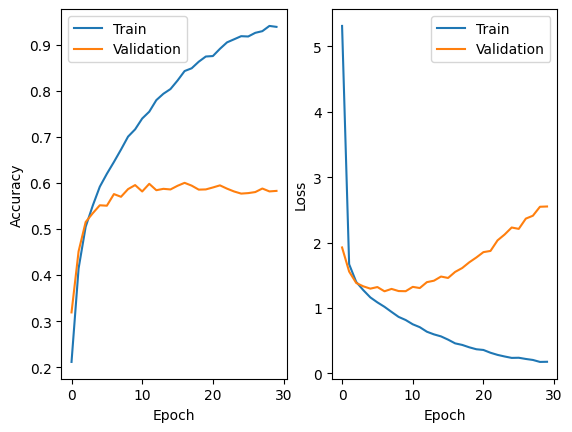

In [ ]:
plt.figure()

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
#plt.axis([0,10,0,1])

plt.subplot(1,2,2)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
#plt.axis([0,10,0,1])

plt.show()